In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

import os
from os.path import join
array = os.path.abspath('').split('/')
homedir = '/'
for i in range(1,7):
   homedir = join(homedir, array[i])
plotPath = join(homedir, 'plots')

#=================================================
# Prepare the Cassini wind speed plot-based figure:

cassini_filename = '/Users/nguyendat/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data/cassini_saturn_windspeed.csv'
cassini = np.genfromtxt(cassini_filename,delimiter=",",dtype=np.double)
wind=np.array(cassini[:,1])
latitude=np.array(cassini[:,0])

wind_sorted=wind[np.argsort(latitude)]
latitude_sorted=latitude[np.argsort(latitude)]

wind=wind_sorted
latitude=latitude_sorted

#=================================================

imgsize=500
xcen=(500.0-1.)/2.0
ycen=(500.0-1.)/2.0

In [72]:
cassini.shape

(2410, 2)

### NORMAL CASE: INCLUDE EQUATORIAL WINDS

In [2]:
latitudes=np.zeros((imgsize,imgsize))
windspeed=np.zeros((imgsize,imgsize))
periodimg=np.zeros((imgsize,imgsize))

latitudes[:]=np.NaN
windspeed[:]=np.NaN
periodimg[:]=np.NaN

radius=245. # Radius of Saturn in the synthetic image

Rjup=60268e3 #m

for xx in range(0,imgsize-1):
    for yy in range(0,imgsize-1):
        #Determine if outside the disk?
        # if (xx-xcen)**2+(yy-ycen)**2 >= (radius)**2 or (yy < 353 and yy > 146):
        if (xx-xcen)**2+(yy-ycen)**2 >= (radius)**2:
            latitudes[yy,xx]=np.nan
            windspeed[yy,xx]=np.nan
            periodimg[yy,xx]=np.nan
        else:
            lat=np.degrees(np.arcsin(-(yy-ycen)/radius))
            #latitude=(np.arcsin((yy-ycen)/radius))
            latitudes[yy,xx]=lat
            windspeed[yy,xx]=wind[find_nearest(latitude,lat)]
            rotspeed=2.0*np.pi*Rjup*np.cos(np.arcsin(-(yy-ycen)/radius))/(10.*3600.+34*60.)
            circumference=2.0*np.pi*Rjup*np.cos(np.arcsin(-(yy-ycen)/radius))
            periodimg[yy,xx]=circumference/(rotspeed+windspeed[yy,xx])/3600.


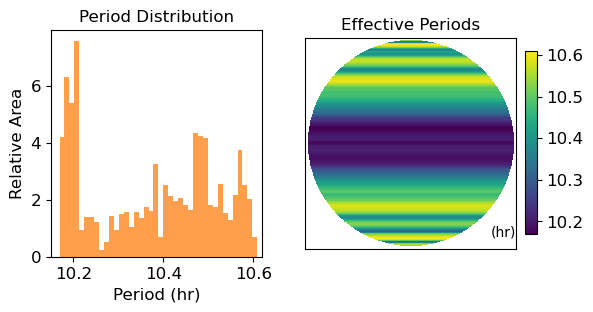

In [3]:
# save = True
save = False

# %matplotlib widget
%matplotlib inline
plt.rcParams.update({'font.size': 12})

#### 
fig2, (ax2a, ax2b) = plt.subplots(1, 2, figsize=(6, 3), dpi=100, gridspec_kw={'width_ratios': [1, 1]})

#### FIRST PLOT
n, bins, patches = ax2a.hist(periodimg[~np.isnan(periodimg)], 40, density=True, facecolor='tab:orange', alpha=0.75)
# ax2a.text(9.81,35,'Synthetic Saturn Model: Period Distribution from Cassini Windspeed',horizontalalignment='left',fontsize=10,color='blue')
ax2a.set_xlabel('Period (hr)')
ax2a.set_ylabel('Relative Area')
ax2a.set_title('Period Distribution', fontsize=12)
ax2a.set_xlim((10.15,10.62))
# ax2a.set_xticks([]), ax2a.set_xticks([9.80, 9.850, 9.90, 9.95, 10.0])

#### Saturn IMAGE

# imgplot = ax2b.imshow(windspeed, cmap="coolwarm")
# ax2b.text(430,470,'[m/s]',fontsize=9)
# ax2b.text(20,45,'b',fontsize=16,color='black')
# cax2 = fig2.add_axes([0.93, 0.2, 0.020, 0.61])
# plt.colorbar(imgplot,shrink=1.00, cax=cax2, orientation='vertical', ax=ax2b)

# ax2b.axes.xaxis.set_visible(False)
# ax2b.axes.yaxis.set_visible(False)

# ax2b.set_title('Wind Speeds in Saturn Model',fontsize=12)

imgplot2 = ax2b.imshow(periodimg, cmap="viridis")
ax2b.set_title('Effective Periods',fontsize=12)
cax2 = fig2.add_axes([0.915, 0.2, 0.020, 0.61])
ax2b.text(440,470,'(hr)',fontsize=10)
# ax2b.text(20,45,'c',fontsize=18,color='black')
plt.colorbar(imgplot2,shrink=1.00,cax=cax2, orientation='vertical', ax=ax2b)

ax2b.axes.xaxis.set_visible(False)
ax2b.axes.yaxis.set_visible(False)

if save: 
    plotOut = plotPath + '/CassiniSaturn_model_panelB'
    fig2.savefig(plotOut+'.pdf', dpi=300, format='pdf', bbox_inches = 'tight')
    fig2.savefig(plotOut+'.png', dpi=300, format='png', bbox_inches = 'tight')

# imgplot2 = f3_ax3.imshow(periodimg, cmap="hot")
# f3_ax3.set_title('Effective Periods from Cassini Windspeed',fontsize=12)
# cax3 = fig3.add_axes([0.93, 0.07, 0.020, 0.41])
# f3_ax3.text(450,470,'[h]',fontsize=9)
# f3_ax3.text(20,45,'c',fontsize=18,color='black')
# fig3.colorbar(imgplot2,shrink=1.00,cax=cax3, orientation='vertical')

# f3_ax3.axes.xaxis.set_visible(False)
# f3_ax3.axes.yaxis.set_visible(False)

# fig3.savefig('Saturn-model.png')

# #====================================================
# fig = plt.figure(figsize=(6.00, 4.00), dpi=100)
# plt.subplot(2,1,1)

# n, bins, patches = plt.hist(periodimg[~np.isnan(periodimg)], 80, density=True, facecolor='b', alpha=0.75)

# plt.text(9.81,35,'Synthetic Saturn Model: Period Distribution',horizontalalignment='left',fontsize=10,color='blue')
# plt.ylabel('Relative Area')
# plt.xlim(9.80, 10.0)
# plt.ylim(0, 40)
# plt.show()

# #=====================DEBUG==================
# fig = plt.figure(figsize=(6.00, 4.00), dpi=100)
# plt.subplot(2,1,1)

# n, bins, patches = plt.hist(windspeed[~np.isnan(windspeed)], 50, density=True, facecolor='b', alpha=0.75)

# plt.xlabel('Windspeed')
# plt.ylabel('Relative Area')
# plt.title('Histogram of Windspeed')
# plt.show()

### SPECIAL: ONLY Mid-latitudes to Polar wind

In [4]:
latitudes2=np.zeros((imgsize,imgsize))
windspeed2=np.zeros((imgsize,imgsize))
periodimg2=np.zeros((imgsize,imgsize))

latitudes2[:]=np.NaN
windspeed2[:]=np.NaN
periodimg2[:]=np.NaN

radius=245. # Radius of Saturn in the synthetic image

Rjup=60268e3 #m

for xx in range(0,imgsize-1):
    for yy in range(0,imgsize-1):
        #Determine if outside the disk?
        if (xx-xcen)**2+(yy-ycen)**2 >= (radius)**2 or (yy < 353 and yy > 146):
        # if (xx-xcen)**2+(yy-ycen)**2 >= (radius)**2:
            latitudes2[yy,xx]=np.nan
            windspeed2[yy,xx]=np.nan
            periodimg2[yy,xx]=np.nan
        else:
            lat=np.degrees(np.arcsin(-(yy-ycen)/radius))
            #latitude=(np.arcsin((yy-ycen)/radius))
            latitudes2[yy,xx]=lat
            windspeed2[yy,xx]=wind[find_nearest(latitude,lat)]
            rotspeed=2.0*np.pi*Rjup*np.cos(np.arcsin(-(yy-ycen)/radius))/(10.*3600.+34*60.)
            circumference=2.0*np.pi*Rjup*np.cos(np.arcsin(-(yy-ycen)/radius))
            periodimg2[yy,xx]=circumference/(rotspeed+windspeed2[yy,xx])/3600.


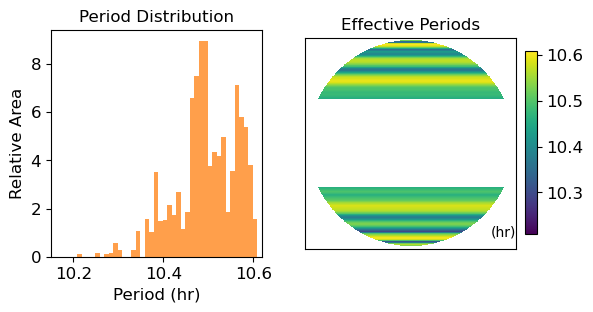

In [5]:
# save = True
save = False

# %matplotlib widget
%matplotlib inline
plt.rcParams.update({'font.size': 12})

#### 
fig2, (ax2a, ax2b) = plt.subplots(1, 2, figsize=(6, 3), dpi=100, gridspec_kw={'width_ratios': [1, 1]})

#### FIRST PLOT
n2, bins2, patches2 = ax2a.hist(periodimg2[~np.isnan(periodimg2)], 40, density=True, facecolor='tab:orange', alpha=0.75)
# ax2a.text(9.81,35,'Synthetic Saturn Model: Period Distribution from Cassini Windspeed',horizontalalignment='left',fontsize=10,color='blue')
ax2a.set_xlabel('Period (hr)')
ax2a.set_ylabel('Relative Area')
ax2a.set_title('Period Distribution', fontsize=12)
ax2a.set_xlim((10.15,10.62))
# ax2a.set_xticks([]), ax2a.set_xticks([9.80, 9.850, 9.90, 9.95, 10.0])
#### Saturn IMAGE

# imgplot = ax2b.imshow(windspeed2, cmap="coolwarm")
# ax2b.text(430,470,'[m/s]',fontsize=9)
# ax2b.text(20,45,'b',fontsize=16,color='black')
# cax2 = fig2.add_axes([0.93, 0.2, 0.020, 0.61])
# plt.colorbar(imgplot,shrink=1.00, cax=cax2, orientation='vertical', ax=ax2b)

# ax2b.axes.xaxis.set_visible(False)
# ax2b.axes.yaxis.set_visible(False)

# ax2b.set_title('Wind Speeds in Saturn Model',fontsize=12)

imgplot2 = ax2b.imshow(periodimg2, cmap="viridis")
ax2b.set_title('Effective Periods',fontsize=12)
cax2 = fig2.add_axes([0.915, 0.2, 0.020, 0.61])
ax2b.text(440,470,'(hr)',fontsize=10)
# ax2b.text(20,45,'c',fontsize=18,color='black')
plt.colorbar(imgplot2,shrink=1.00,cax=cax2, orientation='vertical', ax=ax2b)

ax2b.axes.xaxis.set_visible(False)
ax2b.axes.yaxis.set_visible(False)

if save: 
    plotOut = plotPath + '/CassiniSaturn_model_panelC'
    fig2.savefig(plotOut+'.pdf', dpi=300, format='pdf', bbox_inches = 'tight')
    fig2.savefig(plotOut+'.png', dpi=300, format='png', bbox_inches = 'tight')

# imgplot2 = f3_ax3.imshow(periodimg2, cmap="hot")
# f3_ax3.set_title('Effective Periods from Cassini Windspeed',fontsize=12)
# cax3 = fig3.add_axes([0.93, 0.07, 0.020, 0.41])
# f3_ax3.text(450,470,'[h]',fontsize=9)
# f3_ax3.text(20,45,'c',fontsize=18,color='black')
# fig3.colorbar(imgplot2,shrink=1.00,cax=cax3, orientation='vertical')

# f3_ax3.axes.xaxis.set_visible(False)
# f3_ax3.axes.yaxis.set_visible(False)

# fig3.savefig('Saturn-model.png')

# #====================================================
# fig = plt.figure(figsize=(6.00, 4.00), dpi=100)
# plt.subplot(2,1,1)

# n, bins, patches = plt.hist(periodimg2[~np.isnan(periodimg2)], 80, density=True, facecolor='b', alpha=0.75)

# plt.text(9.81,35,'Synthetic Saturn Model: Period Distribution',horizontalalignment='left',fontsize=10,color='blue')
# plt.ylabel('Relative Area')
# plt.xlim(9.80, 10.0)
# plt.ylim(0, 40)
# plt.show()

# #=====================DEBUG==================
# fig = plt.figure(figsize=(6.00, 4.00), dpi=100)
# plt.subplot(2,1,1)

# n, bins, patches = plt.hist(windspeed2[~np.isnan(windspeed2)], 50, density=True, facecolor='b', alpha=0.75)

# plt.xlabel('Windspeed')
# plt.ylabel('Relative Area')
# plt.title('Histogram of Windspeed')
# plt.show()

#### Plot of windspeed vs latitude of Cassini data

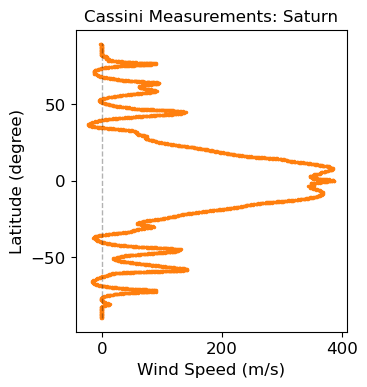

In [16]:
# save = True
save = False
fontSize = 14
plt.rcParams.update({'font.size': fontSize})
# Create simulated Saturn wind speed imaged
fig1, ax1 = plt.subplots(figsize=(3.5, 4), dpi=100)
            
ax1.plot(wind,latitude,'o',markersize=1.5,alpha=1, c='tab:orange')
ax1.plot([0,0],[-90,90],'--',linewidth=1.0,alpha=0.3,color='k')
ax1.set_xlabel('Wind Speed (m/s)',fontsize=12)
ax1.set_ylabel('Latitude (degree)',fontsize=12)
# ax1.text(-80,80,'a',fontsize=18,color='black')
# ax1.set_xlim([-100,200])
# ax1.set_ylim([-90,90])
ax1.set_title('Cassini Measurements: Saturn',fontsize=12)
plt.yticks(fontsize=12), plt.xticks(fontsize=12)

if save: 
    plotOut = plotPath + '/CassiniSaturn_model_panelA'
    fig1.savefig(plotOut+'.pdf', dpi=300, format='pdf', bbox_inches = 'tight')
    fig1.savefig(plotOut+'.png', dpi=300, format='png', bbox_inches = 'tight')

### Plot of histograms superimposed

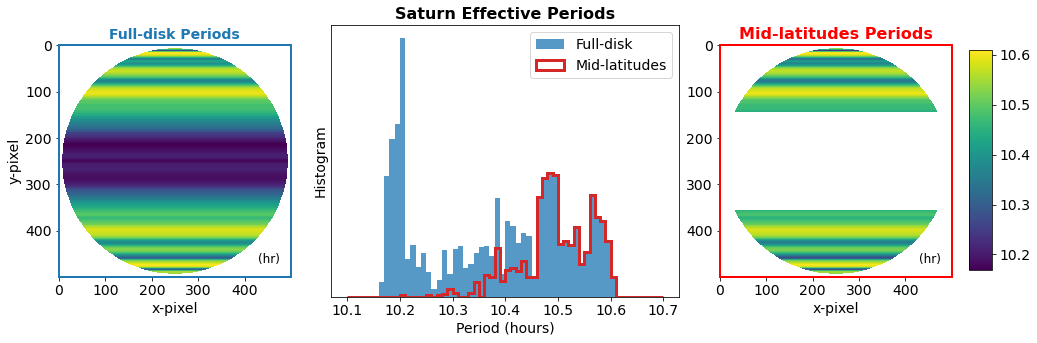

In [24]:
save = True
# save = False

# %matplotlib widget
%matplotlib inline
fontSize = 14
plt.rcParams.update({'font.size': fontSize})

plt.close(),
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5), gridspec_kw={'width_ratios': [1,1.5,1]})

# plot superimposed histograms
n, bins, patches = ax2.hist(periodimg[~np.isnan(periodimg)], 60, range=(10.1, 10.7), density=False, facecolor='tab:blue', alpha=0.75, label='Full-disk')
n2, bins2, patches2 = ax2.hist(periodimg2[~np.isnan(periodimg2)], 60, range=(10.1, 10.7), density=False, histtype='step', color='tab:red', lw=3, alpha=1, label='Mid-latitudes')
ax2.set_yticks([]), ax2.set_xlabel('Period (hours)'), ax2.set_ylabel('Histogram')
ax2.set_title('Saturn Effective Periods', weight='bold', fontsize=16)
ax2.legend()

# first map
im1 = ax1.imshow(periodimg, cmap="viridis")
ax1.set_title('Full-disk Periods',fontsize=fontSize, weight='bold', color='tab:blue')
c_ax1 = fig.add_axes([0.915, 0.2, 0.020, 0.61])
ax1.text(430,470,'(hr)',fontsize=12)
plt.colorbar(im1,shrink=1.00,cax=c_ax1, orientation='vertical', ax=ax1)

plt.setp(ax1.spines.values(), color='tab:blue')
# change all spines
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(2)

# second map
im2 = ax3.imshow(periodimg2, cmap="viridis")
# ax3.clim((9.825, 9,975))
ax3.set_title('Mid-latitudes Periods',fontsize=16, weight='bold', color='r')
ax3.text(430,470,'(hr)',fontsize=12)

ax1.set_xlabel('x-pixel')
ax1.set_ylabel('y-pixel')

ax3.set_xlabel('x-pixel')

plt.setp(ax3.spines.values(), color='r')
# change all spines
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(2)

plt.subplots_adjust(wspace=0.15)

if save: 
    plotOut = plotPath + '/Superimposed_Hist_CassiniSaturn_model'
    fig.savefig(plotOut+'.pdf', dpi=300, format='pdf', bbox_inches = 'tight')
    fig.savefig(plotOut+'.png', dpi=300, format='png', bbox_inches = 'tight')

###### 